# Importing the main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")
print(dataset.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


# Preliminary Viewing of Data

## Basic overview

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Checking the categorical data 

In [4]:
dataset["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [5]:
dataset["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

## Plotting of the histograms

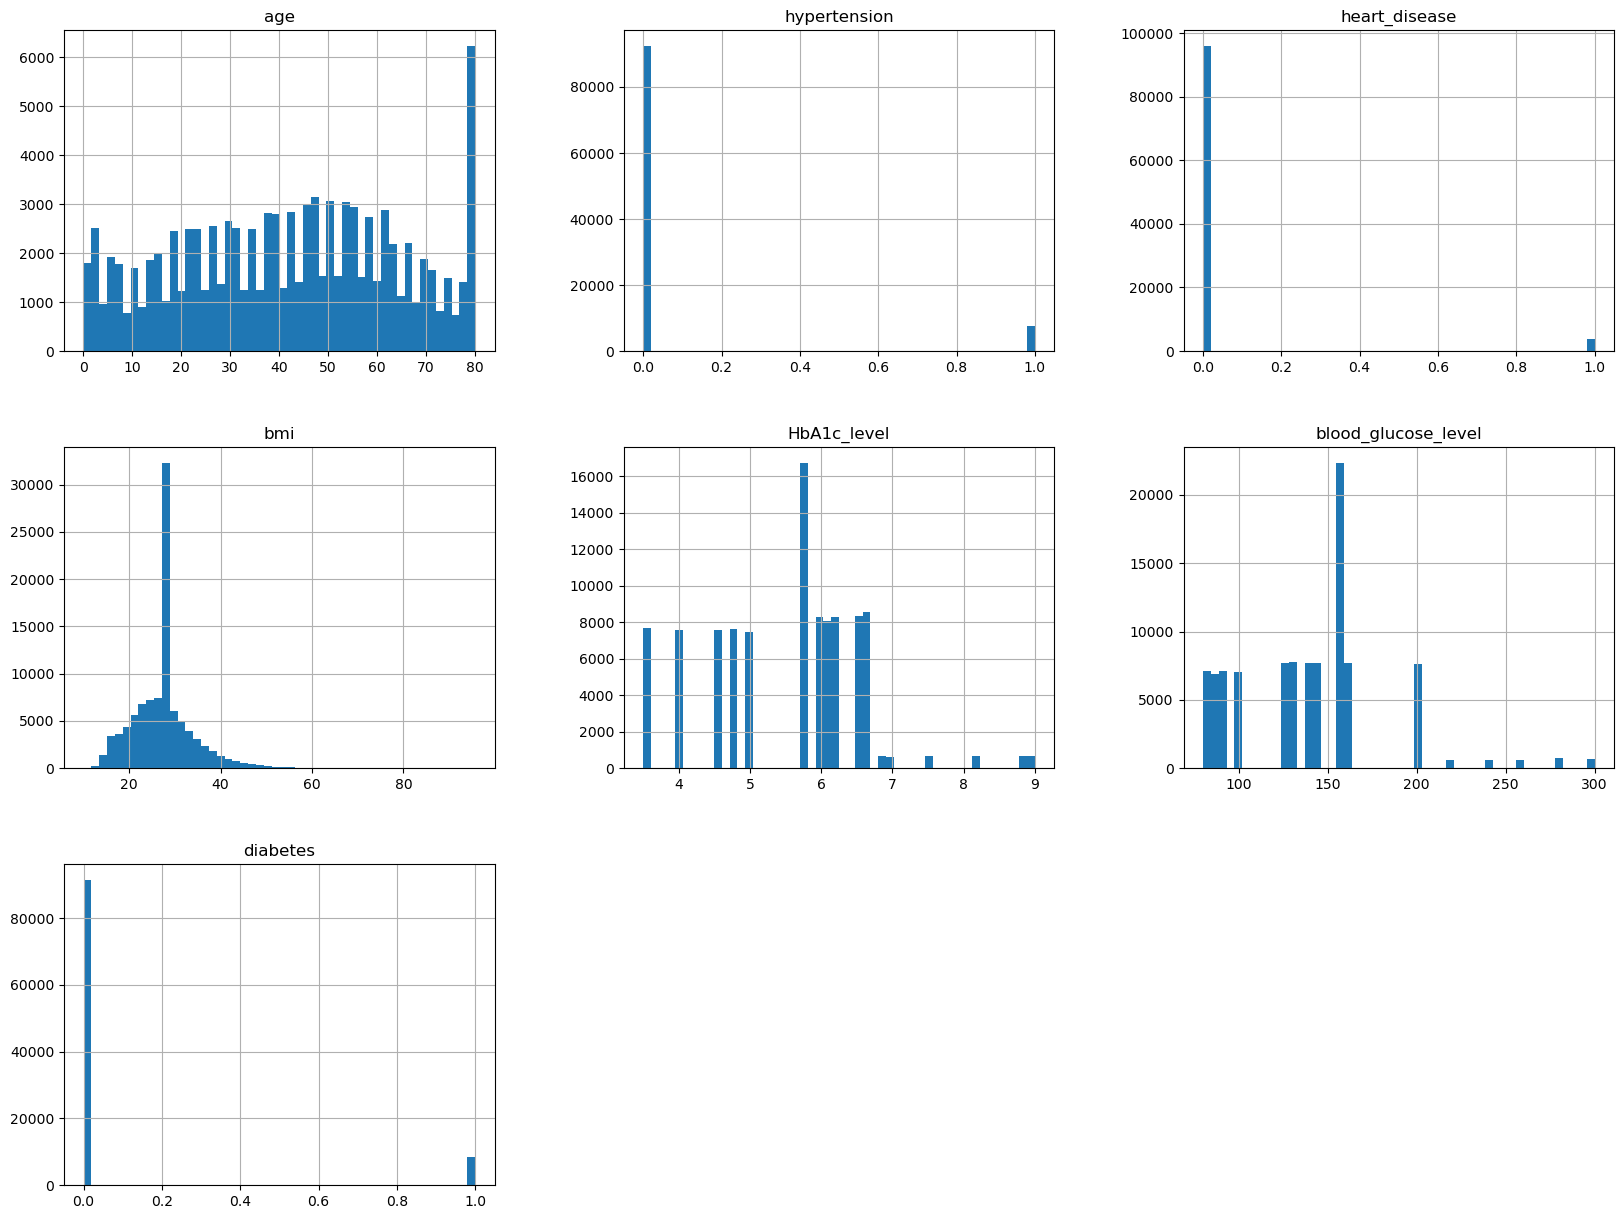

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Finding correlation with target variable

In [8]:
correlation = dataset.corr()
correlation["diabetes"].sort_values(ascending = False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

# Cleaning and Processing the data

## Dealing with the smoking category

In [9]:
dataset.loc[dataset["smoking_history"] == 'No Info','smoking_history'] = np.nan
dataset.loc[dataset['smoking_history'] == 'former', 'smoking_history'] = "not current"
print(dataset.info())
dataset.dropna(subset = ["smoking_history"], inplace = True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      64184 non-null   object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  object 
 1   

In [10]:
print(dataset["smoking_history"].value_counts())
print(dataset["gender"].value_counts())

never          35095
not current    15799
current         9286
ever            4004
Name: smoking_history, dtype: int64
Female    38852
Male      25320
Other        12
Name: gender, dtype: int64


## Dealing with the gender category

In [11]:
dataset = dataset[dataset["gender"]!="Other"]
dataset["gender"].value_counts()

Female    38852
Male      25320
Name: gender, dtype: int64

## Separating into target variable and splitting the dataset

In [12]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [13]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#[we get higher accuracy score with this split]

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(x, y)):
    train = train_index
    test = test_index

In [15]:
i1 = []
for i in train:
    i1.append(i)
    
i2 = []
for i in test:
    i2.append(i)

x_train = x.iloc[i1, :]
x_test = x.iloc[i2, :]


In [16]:
y_train = y.iloc[i1]
y_test = y.iloc[i2]

## Encoding and Scaling the data 

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

attr1 = ["gender"]
attr2 = ["smoking_history"]
attr3 = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
ct = ColumnTransformer(transformers =
    [("Standard", StandardScaler(), attr3),
     ('OneHot', OneHotEncoder(), attr2),
    ('Ordinal', OrdinalEncoder(), attr1)],
      remainder = "passthrough")

x_train = ct.fit_transform(x_train)

In [18]:
print(pd.DataFrame(x_train))

             0         1         2         3         4         5    6    7   \
0      0.641574 -0.328671  4.514588  0.340677  0.124744 -1.416485  0.0  0.0   
1      0.385447 -0.328671 -0.221504 -0.072696  0.489883  0.124945  0.0  1.0   
2     -0.485386 -0.328671 -0.221504  2.865312  2.406862  2.377804  0.0  0.0   
3      0.487898 -0.328671 -0.221504  0.457034  0.946307 -1.297913  0.0  0.0   
4     -0.280484 -0.328671 -0.221504  0.382014  2.954571  3.326376  0.0  0.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
51332 -0.690288 -0.328671 -0.221504 -0.732561 -0.514249  0.480659  0.0  0.0   
51333  1.666083  3.042555 -0.221504 -1.191864 -1.427096 -0.942199  0.0  0.0   
51334 -1.151317 -0.328671 -0.221504  0.028351  0.124744  0.006373  0.0  0.0   
51335 -1.100091 -0.328671 -0.221504 -0.293161  0.216029 -1.416485  0.0  1.0   
51336  0.897701 -0.328671  4.514588 -0.824421  0.855022 -1.416485  0.0  0.0   

        8    9    10  
0      0.0  1.0  1.0  
1    

# Building the model

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
x_test = ct.transform(x_test)

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(random_state = 0)
classifier1.fit(x_train, y_train)

y_pred = classifier1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9399298792364628
[[11011   415]
 [  356  1053]]


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(x_train, y_train)

y_pred = classifier2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9476431632255551
[[11255   171]
 [  501   908]]


## Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 50, random_state = 0) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier3.fit(x_train, y_train)
classifier3.fit(x_train, y_train)

y_pred = classifier3.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9606544604596806
[[11365    61]
 [  444   965]]


## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)

y_pred = classifier4.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9004285157771718
[[10608   818]
 [  460   949]]


## K-NN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier5 = KNeighborsClassifier(n_neighbors = 9) #grid search was not used, but I experimented with a few values for n_neighbors. This gave the best result
classifier5.fit(x_train, y_train)

y_pred = classifier5.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.951227113361901
[[11343    83]
 [  543   866]]


## Support Vector Classifier (RBF model) 

In [25]:
from sklearn.svm import SVC
classifier6 = SVC(kernel = 'rbf', random_state = 0) #linear model was tried, results were lower
classifier6.fit(x_train, y_train)

y_pred = classifier6.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9533307362680171
[[11400    26]
 [  573   836]]


## Stacking Model

In [26]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 9)))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC(kernel = 'rbf')))
level0.append(('bayes', GaussianNB()))
level0.append(('random', RandomForestClassifier(n_estimators = 50)))

level1 = LogisticRegression()

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9603428126217375
[[11353    73]
 [  436   973]]


# Voting Classifier

In [27]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', LogisticRegression()), ('svc', SVC(kernel = 'rbf', probability = True)), ('rf', RandomForestClassifier(n_estimators = 50))],
 voting='soft')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9600311647837944
[[11370    56]
 [  457   952]]


In [28]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', LogisticRegression()), ('svc', SVC(kernel = 'rbf')), ('rf', RandomForestClassifier(n_estimators = 50)), ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier(n_neighbors = 9))],
 voting='hard')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9574600701207635
[[11384    42]
 [  504   905]]
